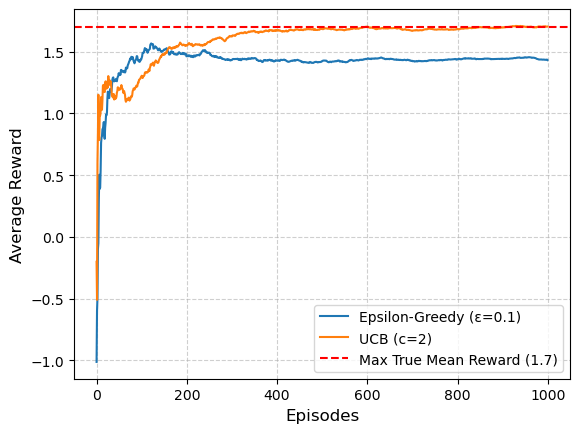

Fixed true means: [0.1, -0.5, 1.5, 0.8, 1.1, -1.0, 0.3, 0.6, 1.7, 1.4]
Final estimated values:
Epsilon-Greedy: [-0.17 -0.37  1.55  0.74  1.07 -0.9   1.25  0.74  1.12  1.2 ]
UCB: [-0.45 -0.82  1.45  0.71  0.91 -0.88 -0.08  0.57  1.76  0.76]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, true_means):
        self.true_means = np.array(true_means)
        self.k = len(self.true_means)

        self.std = np.ones(self.k)

        self.r_est = np.zeros(self.k)      
        self.n = np.zeros(self.k)             

    def pull(self, action):

        reward = np.random.normal(self.true_means[action], self.std[action])

        return reward

    def update(self, action, reward):

        self.n[action] += 1
        self.r_est[action] = self.r_est[action] + (reward - self.r_est[action]) / self.n[action]

def epsilon_greedy(bandit_instance, episodes=1000, epsilon=0.1):
    rewards = np.zeros(episodes)

    for i in range(episodes):
        if np.random.rand() < epsilon:
            action = np.random.randint(0, bandit_instance.k) 
        else:
            action = np.argmax(bandit_instance.r_est) 

        reward = bandit_instance.pull(action)
        bandit_instance.update(action, reward)
        rewards[i] = reward

    return bandit_instance.r_est, rewards 

def ucb_strategy(bandit_instance, episodes=1000, c=1): 
    rewards = np.zeros(episodes)

    for arm in range(bandit_instance.k):
        reward = bandit_instance.pull(arm)
        bandit_instance.update(arm, reward)
        rewards[arm] = reward

    for i in range(bandit_instance.k, episodes):
        ucb_values = bandit_instance.r_est + c * np.sqrt(np.log(i) / bandit_instance.n) 

        action = np.argmax(ucb_values)  

        reward = bandit_instance.pull(action)
        bandit_instance.update(action, reward)
        rewards[i] = reward

    return bandit_instance.r_est, rewards  

np.random.seed(42)
episodes = 1000
true_means = [0.1, -0.5, 1.5, 0.8, 1.1, -1.0, 0.3, 0.6, 1.7, 1.4]

bandit1 = Bandit(true_means)
bandit2 = Bandit(true_means)

bandit1_r_est, rewards_eps  = epsilon_greedy(bandit1, episodes, epsilon=0.1)
bandit2_r_est, rewards_ucb  = ucb_strategy(bandit2, episodes, c=1)

avg_eps = np.cumsum(rewards_eps) / (np.arange(episodes) + 1) 
avg_ucb = np.cumsum(rewards_ucb) / (np.arange(episodes) + 1)

plt.plot(avg_eps, label='Epsilon-Greedy (ε=0.1)')
plt.plot(avg_ucb, label='UCB (c=2)')
plt.axhline(y=max(true_means), color='red', linestyle='--', label=f'Max True Mean Reward ({max(true_means)})') 
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Average Reward', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Fixed true means:", true_means)
print("Final estimated values:")
print("Epsilon-Greedy:", np.round(bandit1_r_est, 2))
print("UCB:", np.round(bandit2_r_est, 2))